# Defining the nature and scope of the project

Iris Dataset is considered as the Hello World for data science. It contains five columns namely – Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally. As this is a built-in public dataset we will import from sklearn and work on it. The data is pre-processed and have no missing value with the "Species" column replaced and label encoded with "target" column. We will explore how data visualization clearly differentiates the three flowers with the given features. Then we will apply different classifier models and try to find out the best model with best parameter. Finally training and evaluating using the best one. 

## Importing Necessary Libraries

In [1]:
from time import time
from datetime import datetime
start=datetime.now()

from sklearn.datasets import load_iris
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Loading and exploring data

In [2]:
iris=load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
data = df.drop_duplicates(subset ="target",)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [6]:
df.value_counts("target")

target
0    50
1    50
2    50
dtype: int64

## Data Visualization

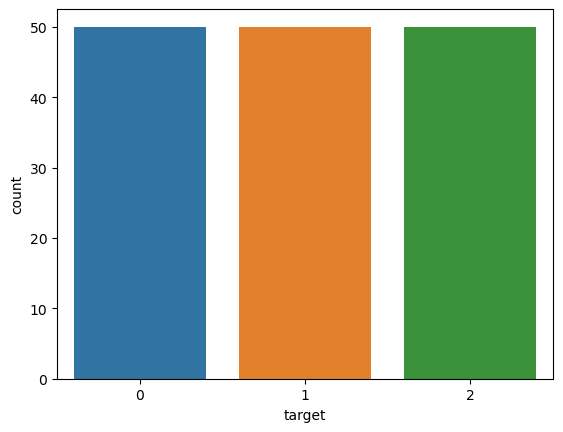

In [7]:
sns.countplot(x='target', data=df, )
plt.show()

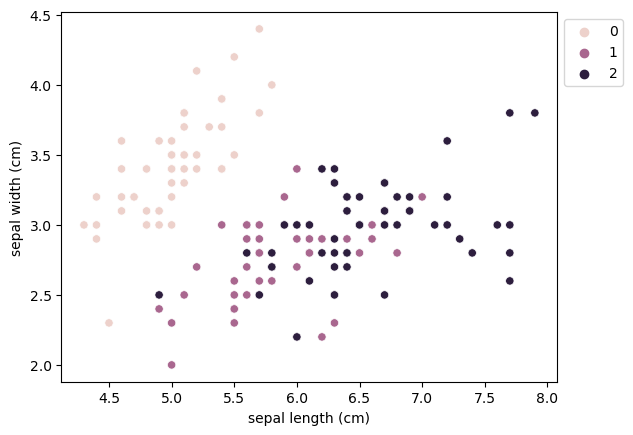

In [8]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='target', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

** Observations **

1) Species Setosa has smaller sepal lengths but larger sepal widths.

2) Versicolor Species lies in the middle of the other two species in terms of sepal length and width

3) Species Virginica has larger sepal lengths but smaller sepal widths.

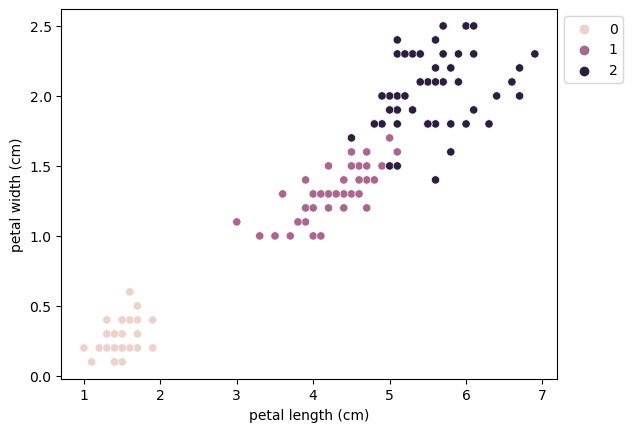

In [9]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='target', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

** Observations **

1) Species Setosa has smaller petal lengths and widths.

2) Versicolor Species lies in the middle of the other two species in terms of petal length and width.

3) Species Virginica has the largest of petal lengths and widths.

## Cleaning and Preprocessing data

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Findings**
1) We can see the dataset has no missing value.

2) The built-in data set is already cleaned and preprocessed

## Splitting the Data

In [11]:
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Scaling the Data

In [13]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Function to compare different models

In [14]:
%%time
# List of models to try
models = [KNeighborsClassifier(),
          GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
         ]

# Hyperparameters to try
param_grid = {'KNeighborsClassifier': {'n_neighbors': [10,12,14,16,18,20,22,24,26,28,30]},
              'GaussianNB': {'var_smoothing': [.00001,.0001,.001,0.01,0.1,1,10]},
              'LogisticRegression':{'C': [.00001,.0001,.001,0.01,0.1,1,10]},
              'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
              'DecisionTreeClassifier': {'max_depth': [3, 5, 70,85]},
              'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]}
             }


# Dataframe to store results
metrics = {'Model': [], 'ATR': [], 'ATS': [], 'F1_TR': [], 'F1_TS': [], 'TIME': [], 'B_P': []}

# Looping through models
for i, model in enumerate(models):
    mst = time()
    
    # Get model name
    model_name = str(model).replace("()","")
    
    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")
    

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # Append in a list for future use
    # basic_models.append(model)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_train = f1_score(y_pred_train,y_train,average='micro' )
    f1_test = f1_score(y_pred_test,y_test,average='micro')
    
    # Calculate run time for model
    met = time()
    mrt = met-mst
    minute=int(mrt/60)
    second=mrt%60
    
    # Append to DataFrame
    metrics['Model'].append(model_name)    
    metrics['ATR'].append(f"{accuracy_train:.3f}")
    metrics['ATS'].append(f"{accuracy_test:.3f}")
    metrics['F1_TR'].append(f"{f1_train:.3f}")
    metrics['F1_TS'].append(f"{f1_test:.3f}")
    metrics['TIME'].append(f"{mrt:.3f}")
    metrics['B_P'].append(best_params)
    
    metrics_df = pd.DataFrame(metrics)
    

    print(f"{model.__class__.__name__}: accuracy_train={accuracy_train:.4f} accuracy_test={accuracy_test:.4f} f1_train={f1_train:.4f}, f1_test = {f1_test:.4f}")
    met = time()
    mrt = met-mst
    minute=int(mrt/60)
    second=mrt%60
    if minute>=60:
        hour=int(minute/60)
        minute=minute%60
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
    else:
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")
    print()


Best Paramenters for KNeighborsClassifier is {'n_neighbors': 10}
KNeighborsClassifier: accuracy_train=0.9524 accuracy_test=0.9778 f1_train=0.9524, f1_test = 0.9778
Total execution time for KNeighborsClassifier is : 3.5644114017486572'.
Which translates to: 0 minutes and 3.564 seconds.

Best Paramenters for GaussianNB is {'var_smoothing': 1e-05}
GaussianNB: accuracy_train=0.9429 accuracy_test=1.0000 f1_train=0.9429, f1_test = 1.0000
Total execution time for GaussianNB is : 0.05300402641296387'.
Which translates to: 0 minutes and 0.053 seconds.

Best Paramenters for LogisticRegression is {'C': 1}
LogisticRegression: accuracy_train=0.9714 accuracy_test=0.9778 f1_train=0.9714, f1_test = 0.9778
Total execution time for LogisticRegression is : 0.12402963638305664'.
Which translates to: 0 minutes and 0.124 seconds.

Best Paramenters for RandomForestClassifier is {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
RandomForestClassifier: accuracy_train=1.0000 accuracy_test=0.9778 f1_trai

## [10] Representing the findings in a table and sorting out the best model with parameters

In [15]:
# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.add_column("Model Name", metrics['Model'])
table.add_column("Accu_train",metrics['ATR'])
table.add_column("Accu_test",metrics['ATS'])
table.add_column("F1_train",metrics['F1_TR'])
table.add_column("F1_test",metrics['F1_TS'])
table.add_column("Time",metrics['TIME'])
table.add_column("Best parameters",metrics['B_P'])

# Set the alignment of the columns
# table.align["Model"] = "l"
# table.align["MAE"] = "r"
# table.align["MSE"] = "r"
# table.align["R2"] = "r"
# table.align["Adjusted R2"] = "r"

print(table)

+----------------------------+------------+-----------+----------+---------+-------+-----------------------------------------------------------+
|         Model Name         | Accu_train | Accu_test | F1_train | F1_test |  Time |                      Best parameters                      |
+----------------------------+------------+-----------+----------+---------+-------+-----------------------------------------------------------+
|    KNeighborsClassifier    |   0.952    |   0.978   |  0.952   |  0.978  | 3.563 |                    {'n_neighbors': 10}                    |
|         GaussianNB         |   0.943    |   1.000   |  0.943   |  1.000  | 0.052 |                  {'var_smoothing': 1e-05}                 |
|     LogisticRegression     |   0.971    |   0.978   |  0.971   |  0.978  | 0.124 |                          {'C': 1}                         |
|   RandomForestClassifier   |   1.000    |   0.978   |  1.000   |  0.978  | 2.527 | {'max_depth': 80, 'max_features': 2, 'n_estim

In [16]:
best=metrics_df.sort_values(by = ['ATR','F1_TR'], ascending=False).set_index('Model')
print(best)
print()
print(f"Best Model is : \033[1m{best.index[0]}\033[0m with the best parameters : \033[1m{best.iloc[0,-1]}\033[0m")

                              ATR    ATS  F1_TR  F1_TS   TIME  \
Model                                                           
RandomForestClassifier      1.000  0.978  1.000  0.978  2.527   
DecisionTreeClassifier      1.000  0.978  1.000  0.978  0.053   
GradientBoostingClassifier  1.000  0.978  1.000  0.978  2.147   
LogisticRegression          0.971  0.978  0.971  0.978  0.124   
KNeighborsClassifier        0.952  0.978  0.952  0.978  3.563   
GaussianNB                  0.943  1.000  0.943  1.000  0.052   

                                                                          B_P  
Model                                                                          
RandomForestClassifier      {'max_depth': 80, 'max_features': 2, 'n_estima...  
DecisionTreeClassifier                                      {'max_depth': 85}  
GradientBoostingClassifier        {'learning_rate': 0.1, 'n_estimators': 100}  
LogisticRegression                                                   {'C': 1}  

## [10] Representing the findings in a table and sorting out the best model with parameters

In [33]:
final = RandomForestClassifier()

#final =(RandomForestClassifier+'()')

final.set_params(**best.iloc[0,-1])
final.fit(X_train, y_train)

y_pred_train =final.predict(X_train)
y_pred_test = final.predict(X_test)

In [31]:
type(RandomForestClassifier())

sklearn.ensemble._forest.RandomForestClassifier

## Classification Report

In [ ]:
# y_train.value_counts()

In [ ]:
print(classification_report(y_pred_train,y_train,target_names=['setosa','versicolor','virginica']))

In [ ]:
print(classification_report(y_pred_test,y_test,target_names=['setosa','versicolor','virginica']))

## Confusion Matrix

In [ ]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

In [ ]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)

## Total Run-Time

In [ ]:
end=datetime.now()
total_time=end-start
# minute=int(total_time/60)
# second=total_time%60
# if minute>=60:
#     hour=int(minute/60)
#     minute=minute%60
#     print('Total execution time is : {}'.format(total_time))
#     print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
# else:
print('Total execution time is : {}'.format(total_time))
print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")

## Conclusions and Findings

1) The evaluation results show that the 'RandomForestClassifier': {'max_depth': 80, 'max_features': 2, 'n_estimators': 100} gives the best result for the given data set.